# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [14]:
# Import SQLAlchemy `automap` and other dependencies here
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [7]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [8]:
# Use Inspector to print the column names and types
columns = inspector.get_columns("emoji")

for column in columns:
    print(column["name"], column["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [10]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
first_10_rows = engine.execute('SELECT * FROM emoji LIMIT 10')
for row in first_10_rows:
    print(row)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [12]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [15]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [48]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
Emoji = Base.classes.emoji
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).order_by(Emoji.score.desc()).limit(10)

Unpack tuples using list comprehensions

In [50]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
emoji_chars = []
emoji_ids = []
scores = []

for row in results:
    emoji_chars.append(row.emoji_char)
    emoji_ids.append(row.emoji_id)
    scores.append(row.score)

## Plot using Matplotlib

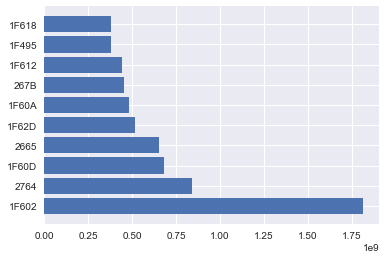

In [62]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.barh(emoji_ids, scores)
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [53]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
results_df = pd.DataFrame({"emoji_char": emoji_chars,
                           "emoji_score": scores},
                          index=emoji_ids)
results_df.head(10)

emoji_char  emoji_score
1F602          😂   1814832150
2764          ❤️    840619939
1F60D          😍    680382416
2665          ♥️    652715459
1F62D          😭    515991922
1F60A          😊    484540701
267B          ♻️    452489849
1F612          😒    441690175
1F495          💕    381679908
1F618          😘    377847645

Plot using Pandas

In [54]:
filtered_cols = results_df[["emoji_score"]]

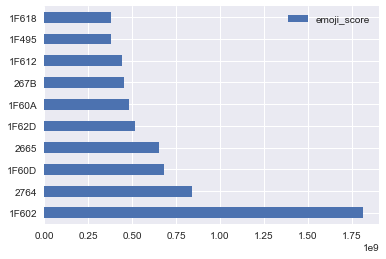

In [57]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
filtered_cols.plot(kind="barh")
plt.show()

In [59]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
results_df2 = pd.read_sql_query('SELECT * FROM emoji ORDER BY score DESC LIMIT 10',"sqlite:///../Resources/emoji.sqlite")
results_df2.head(10)

id emoji_char emoji_id                                 name       score
0   1          😂    1F602               FACE WITH TEARS OF JOY  1814832150
1   2         ❤️     2764                    HEAVY BLACK HEART   840619939
2   3          😍    1F60D  SMILING FACE WITH HEART-SHAPED EYES   680382416
3   4         ♥️     2665                     BLACK HEART SUIT   652715459
4   5          😭    1F62D                   LOUDLY CRYING FACE   515991922
5   6          😊    1F60A       SMILING FACE WITH SMILING EYES   484540701
6   7         ♻️     267B     BLACK UNIVERSAL RECYCLING SYMBOL   452489849
7   8          😒    1F612                        UNAMUSED FACE   441690175
8   9          💕    1F495                           TWO HEARTS   381679908
9  10          😘    1F618                 FACE THROWING A KISS   377847645